# **80 Cereals Analysis**

## **Which Cereal is Healthy for Human Consumption**



This is a multivariate dataset describing seventy-seven commonly available breakfast cereals with sixteen features, based on the information now available on the newly-mandated food and drugs administration (F&DA) food label.
*   What are you getting when you eat a bowl of cereal?
*   Can you get a lot of fiber without a lot of calories?
*   Can you describe what cereals are displayed on high, low, and middle shelves?

The good news is that none of the cereals for which we collected data had any cholesterol, and manufacturers rarely use artificial sweeteners and colors, nowadays. (http://lib.stat.cmu.edu/datasets/1993.expo/)

**Content**

Fields in the dataset:

Name: Name of cereal

mfr: Manufacturer of cereal
A = American Home Food Products; G = General Mills; K = Kelloggs; N = Nabisco; P = Post; Q = Quaker Oats; R = Ralston Purina;

type:
cold;
hot;

calories: calories per serving

protein: grams of protein

fat: grams of fat

sodium: milligrams of sodium

fiber: grams of dietary fiber

carbo: grams of complex carbohydrates

sugars: grams of sugars

potass: milligrams of potassium

vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended

shelf: display shelf (1, 2, or 3, counting from the floor)

weight: weight in ounces of one serving

cups: number of cups in one serving

rating: a rating of the cereals (Possibly from Consumer Reports?)

(https://www.kaggle.com/code/mashhar/data-preprocessing-visualization-model-learning)

In [219]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import scipy.stats as stats


%matplotlib inline

In [220]:
# Load data

cereal_df = pd.read_csv("cereal.csv")
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


### Data Cleaning and Preprocessing

In [221]:
cereal_df.shape

(77, 16)

In [222]:
cereal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [223]:
cereal_df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [224]:
cereal_df.duplicated().sum()

0

In [225]:
# Rename the manufacturer's name to the correct name for easy analysis

cereal_df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [226]:
cereal_df["mfr"].unique()

array(['N', 'Q', 'K', 'R', 'G', 'P', 'A'], dtype=object)

In [227]:
cereal_df["mfr"] = cereal_df["mfr"].replace(['N', 'Q', 'K', 'R', 'G', 'P', 'A'], ['Nabisco', 'Quaker Oats', 'Kelloggs', 'Ralston Purina', 'General Mills', 'Post', 'American Home Food Products'])

In [228]:
cereal_df["mfr"].unique()

array(['Nabisco', 'Quaker Oats', 'Kelloggs', 'Ralston Purina',
       'General Mills', 'Post', 'American Home Food Products'],
      dtype=object)

In [229]:
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,Ralston Purina,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [230]:
# Let's check the features with negative data

numerical_cereal = cereal_df[['calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating']]

numerical_cereal[numerical_cereal < 0].count()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [231]:
# Let's change the negative values in carbo, sugars, and potass to the mean of the features
cereal_df['carbo'].mask(cereal_df['carbo'] < 0, round(cereal_df['carbo'].mean()), inplace=True)
cereal_df['sugars'].mask(cereal_df['sugars'] < 0, round(cereal_df['sugars'].mean()), inplace=True)
cereal_df['potass'].mask(cereal_df['potass'] < 0, round(cereal_df['potass'].mean()), inplace=True)

numerical_cereal[numerical_cereal < 0].count()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

**Exploratory Data Analysis**

In [232]:
# Let's explore the distribution of each of the variables particularly the numerical variables
# For reusability, let's define a function for the distribution plot

def distribution_plot(variable_name, a,b, df = cereal_df):
    sns.set(style="darkgrid")
    sns.histplot(data=df, x= variable_name, kde= True, bins = 10, ax = axs[a,b])
    # plt.title(f'Distribution of {variable_name}')
    plt.xlabel(variable_name)

<bound method Figure.tight_layout of <Figure size 1152x864 with 12 Axes>>

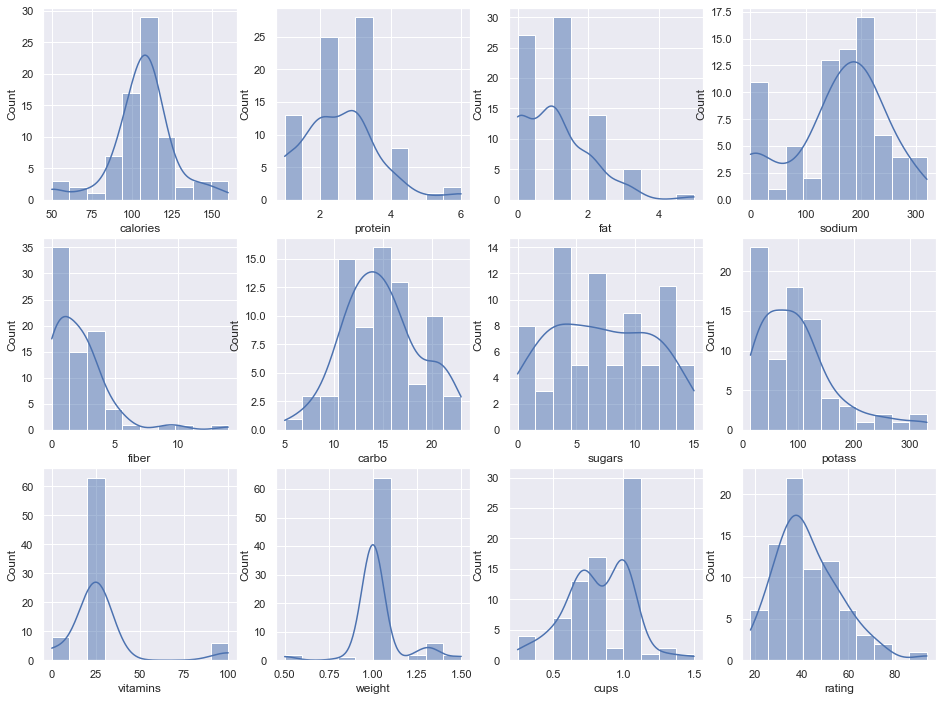

In [233]:
fig,axs = plt.subplots(3,4, figsize = (16, 12))
distribution_plot("calories", 0, 0)
distribution_plot("protein", 0, 1)
distribution_plot("fat", 0, 2)
distribution_plot("sodium", 0, 3)
distribution_plot("fiber", 1, 0)
distribution_plot("carbo", 1, 1)
distribution_plot("sugars", 1, 2)
distribution_plot("potass", 1, 3)
distribution_plot("vitamins", 2, 0)
distribution_plot("weight", 2, 1)
distribution_plot("cups", 2, 2)
distribution_plot("rating", 2, 3)
fig.tight_layout

#### What causes the ratings

In [234]:
# plot a pairwise correlation between ratings and other variables
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,Ralston Purina,C,110,2,2,200,1.0,14.0,8,96,25,3,1.0,0.75,34.384843


<AxesSubplot:>

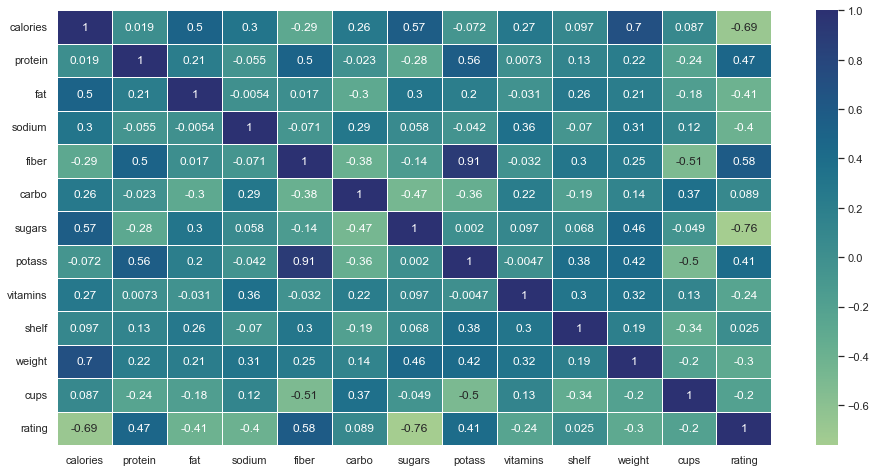

In [235]:
cereal_df_4_corr = cereal_df.drop(['name', 'mfr', 'type'], axis = 1)
corr_matrix = cereal_df_4_corr.corr()

plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True, linewidth=.5, cmap="crest")

<AxesSubplot:>

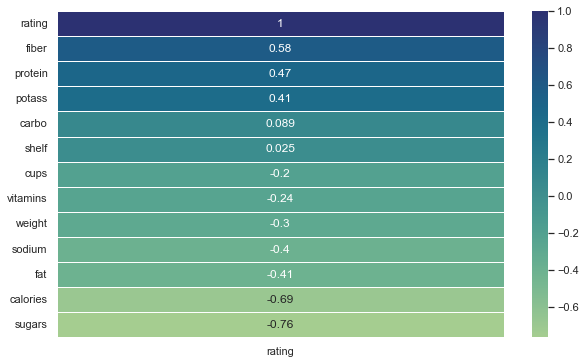

In [236]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix[['rating']].sort_values(by='rating', ascending=False), annot=True, linewidth=.5, cmap="crest")

This shows that fiber, protein, and potassium are the most significant features in determining higher rating and sodium, fat, calories, and sugars are the most significant features for lower ratings

### Data Splitting

Separate the data into features and target, encode categorical variable, remove multicollinearity, and split the data into train test

In [237]:
#  Define your features (X) and target (y)

X = cereal_df.drop(['name', 'mfr', 'potass','rating'], axis = 1)
# Potassium was dropped due to its high correlation with fiber (multicollinearity)

# Transform 'type' to categorical with OneHotEncoder

encoder = OneHotEncoder(sparse=False)

# Fit and transform the 'type' column
encoded = encoder.fit_transform(X[['type']])

# Create a DataFrame from the encoded values with column names
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['type']))

# Concatenate the new DataFrame with the original DataFrame
X = pd.concat([X, encoded_df], axis=1)

# Drop the original 'type' column if needed
X = X.drop(['type'], axis=1)
y = cereal_df['rating']

X.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,vitamins,shelf,weight,cups,type_C,type_H
0,70,4,1,130,10.0,5.0,6,25,3,1.0,0.33,1.0,0.0
1,120,3,5,15,2.0,8.0,8,0,3,1.0,1.00,1.0,0.0
2,70,4,1,260,9.0,7.0,5,25,3,1.0,0.33,1.0,0.0
3,50,4,0,140,14.0,8.0,0,25,3,1.0,0.50,1.0,0.0
4,110,2,2,200,1.0,14.0,8,25,3,1.0,0.75,1.0,0.0


In [238]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Building and Performance Metrics

In [239]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)
print("Linear Regression - MAE: {:.2f}, RMSE: {:.2f}, R-squared: {:.2f}".format(lr_mae, lr_rmse, lr_r2))

Linear Regression - MAE: 0.72, RMSE: 1.05, R-squared: 1.00


In [240]:
# Ridge Regression
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_r2 = r2_score(y_test, ridge_pred)
print("Ridge Regression - MAE: {:.2f}, RMSE: {:.2f}, R-squared: {:.2f}".format(ridge_mae, ridge_rmse, ridge_r2))

Ridge Regression - MAE: 0.76, RMSE: 1.03, R-squared: 1.00


In [241]:
# Lasso Regression
lasso_model = Lasso(alpha=0.001) 
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_r2 = r2_score(y_test, lasso_pred)
print("Lasso Regression - MAE: {:.2f}, RMSE: {:.2f}, R-squared: {:.2f}".format(lasso_mae, lasso_rmse, lasso_r2))

Lasso Regression - MAE: 0.72, RMSE: 1.04, R-squared: 1.00


In [242]:
# Polynomial Regression (with degree=2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)
poly_pred = poly_model.predict(X_test_poly)
poly_mae = mean_absolute_error(y_test_poly, poly_pred)
poly_rmse = np.sqrt(mean_squared_error(y_test_poly, poly_pred))
poly_r2 = r2_score(y_test_poly, poly_pred)
print("Polynomial Regression - MAE: {:.2f}, RMSE: {:.2f}, R-squared: {:.2f}".format(poly_mae, poly_rmse, poly_r2))

Polynomial Regression - MAE: 4.32, RMSE: 6.18, R-squared: 0.83


In [243]:
# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)
print("Random Forest Regression - MAE: {:.2f}, RMSE: {:.2f}, R-squared: {:.2f}".format(rf_mae, rf_rmse, rf_r2))

Random Forest Regression - MAE: 5.27, RMSE: 6.31, R-squared: 0.82


### Feature Importances

Checking out the importance features based on the three best performing linear models; Lr_model, Lasso_model, and Ridge_model

In [244]:
coefficients = lr_model.coef_.round(2)
features = X.columns
feat_imp_lr = pd.Series(coefficients, index = features)
feat_imp_lr = feat_imp_lr.sort_values(ascending = False)
feat_imp_lr

fiber       2.54
protein     2.38
type_C      1.15
cups        0.85
carbo       0.52
weight      0.15
shelf      -0.02
sodium     -0.05
vitamins   -0.05
calories   -0.10
type_H     -1.15
sugars     -1.34
fat        -3.08
dtype: float64

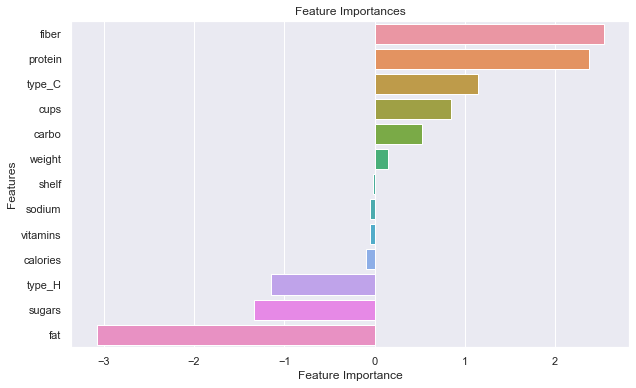

In [245]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp_lr, y=feat_imp_lr.index)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.show()

In [246]:
coefficients = ridge_model.coef_.round(2)
features = X.columns
feat_imp_ridge = pd.Series(coefficients, index = features)
feat_imp_ridge = feat_imp_ridge.sort_values(ascending = False)
feat_imp_ridge

fiber       2.54
protein     2.29
type_C      0.90
carbo       0.54
cups        0.54
weight      0.06
sodium     -0.05
vitamins   -0.05
shelf      -0.06
calories   -0.11
type_H     -0.90
sugars     -1.32
fat        -2.95
dtype: float64

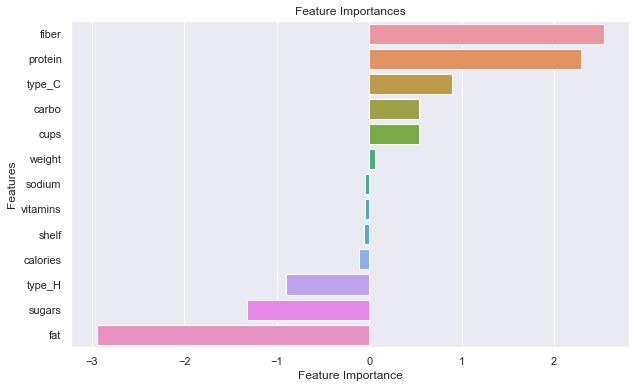

In [247]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp_ridge, y=feat_imp_ridge.index)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.show()

In [248]:
coefficients = lasso_model.coef_.round(2)
features = X.columns
feat_imp_lasso = pd.Series(coefficients, index = features)
feat_imp_lasso = feat_imp_lasso.sort_values(ascending = False)
feat_imp_lasso

fiber       2.54
protein     2.38
type_C      2.26
cups        0.81
carbo       0.52
weight      0.00
type_H     -0.00
shelf      -0.02
sodium     -0.05
vitamins   -0.05
calories   -0.10
sugars     -1.34
fat        -3.09
dtype: float64

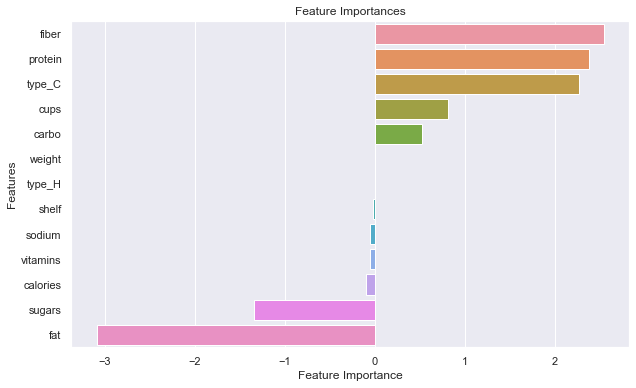

In [249]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp_lasso, y=feat_imp_lasso.index)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.show()

The three feature importance graphs shows some importance features in predicting the ratings of each cereals. It shows that fiber, protein, and cold cereals was an importance positive features to predicting ratings, which means that the higher the fiber and protein, the better the rating provided that cereal is a cold type. 

Similarly, fat, sugars, and sometimes calories and hot cereals possessed to be the important features to predicting cereals as they are negatively related to ratings, which means that the higher any of these 4 features the lower the ratings. 

This also attest to the nutritional facts that fiber and protein are essential component of healthy cereal as the higher they are the richer the cereal while too much of sugars, fats, and calories in cereals should be avoided.

### Feature Engineering

Let's explore the effect of normalizing the dataset on our model performance

#### Let's normalize the data using Z-score transform. 

In [250]:
X_norm = X.apply(stats.zscore)
X_norm.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,vitamins,shelf,weight,cups,type_C,type_H
0,-1.905397,1.337319,-0.012988,-0.356306,3.314439,-2.542635,-0.237416,-0.14627,0.957813,-0.198067,-2.123870,0.201347,-0.201347
1,0.677623,0.417912,3.987349,-1.737087,-0.064172,-1.764690,0.225395,-1.27255,0.957813,-0.198067,0.774053,0.201347,-0.201347
2,-1.905397,1.337319,-0.012988,1.204578,2.892113,-2.024005,-0.468822,-0.14627,0.957813,-0.198067,-2.123870,0.201347,-0.201347
3,-2.938605,1.337319,-1.013072,-0.236238,5.003745,-1.764690,-1.625849,-0.14627,0.957813,-0.198067,-1.388576,0.201347,-0.201347
4,0.161019,-0.501495,0.987096,0.484170,-0.486498,-0.208799,0.225395,-0.14627,0.957813,-0.198067,-0.307262,0.201347,-0.201347


In [251]:
# Split the data into training and testing set
X_norm_train, X_norm_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

In [252]:
# Linear Regression with normalized data
lr_model = LinearRegression()
lr_model.fit(X_norm_train, y_train)
lr_pred_norm = lr_model.predict(X_norm_test)
lr_mae_norm = mean_absolute_error(y_test, lr_pred_norm)
lr_rmse_norm = np.sqrt(mean_squared_error(y_test, lr_pred_norm))
lr_r2_norm = r2_score(y_test, lr_pred_norm)
print("Linear Regression with normalized data - MAE: {:.2f}, RMSE: {:.2f}, R-squared: {:.2f}".format(lr_mae_norm, lr_rmse_norm, lr_r2_norm))

Linear Regression with normalized data - MAE: 0.72, RMSE: 1.05, R-squared: 1.00


In [253]:
# Ridge Regression with normalized data
ridge_model = Ridge(alpha= 1)
ridge_model.fit(X_norm_train, y_train)
ridge_pred_norm = ridge_model.predict(X_norm_test)
ridge_mae_norm = mean_absolute_error(y_test, ridge_pred_norm)
ridge_rmse_norm = np.sqrt(mean_squared_error(y_test, ridge_pred_norm))
ridge_r2_norm = r2_score(y_test, ridge_pred_norm)
print("Ridge Regression with normalized data - MAE: {:.2f}, RMSE: {:.2f}, R-squared: {:.2f}".format(ridge_mae_norm, ridge_rmse_norm, ridge_r2_norm))

Ridge Regression with normalized data - MAE: 0.76, RMSE: 1.00, R-squared: 1.00


In [254]:
# Lasso Regression with normalized data
lasso_model = Lasso(alpha=0.001) 
lasso_model.fit(X_norm_train, y_train)
lasso_pred_norm = lasso_model.predict(X_norm_test)
lasso_mae_norm = mean_absolute_error(y_test, lasso_pred_norm)
lasso_rmse_norm = np.sqrt(mean_squared_error(y_test, lasso_pred_norm))
lasso_r2_norm = r2_score(y_test, lasso_pred_norm)
print("Lasso Regression with normalized data - MAE: {:.2f}, RMSE: {:.2f}, R-squared: {:.2f}".format(lasso_mae_norm, lasso_rmse_norm, lasso_r2_norm))

Lasso Regression with normalized data - MAE: 0.72, RMSE: 1.04, R-squared: 1.00


In [255]:
# Summary performance metrics of the three best model LR, Ridge, and Lasso

metrics = {'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
           'MAE': [lr_mae, ridge_mae, lasso_mae],
           'MAE_norm': [lr_mae_norm, ridge_mae_norm, lasso_mae_norm], 
           'RMSE': [lr_rmse, ridge_rmse, lasso_rmse],
           'RMSE_norm': [lr_rmse_norm, ridge_rmse_norm, lasso_rmse_norm], 
           'R2_Score': [lr_r2, ridge_r2, lasso_r2],
           'R2_Score_norm': [lr_r2_norm, ridge_r2_norm, lasso_r2_norm]
          }
metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,MAE,MAE_norm,RMSE,RMSE_norm,R2_Score,R2_Score_norm
0,Linear Regression,0.721530,0.721530,1.045468,1.045468,0.995024,0.995024
1,Ridge Regression,0.757931,0.758274,1.032640,0.999809,0.995145,0.995449
2,Lasso Regression,0.720410,0.721221,1.044278,1.044392,0.995035,0.995034


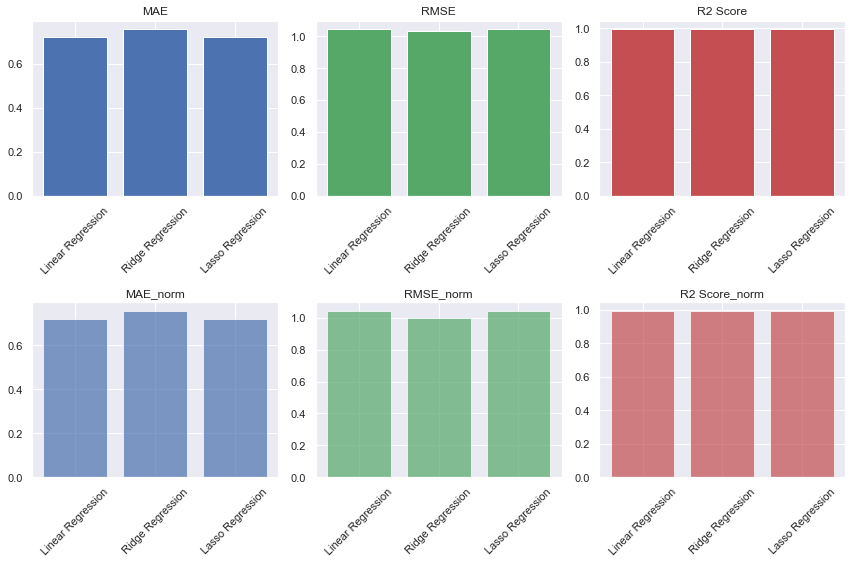

In [256]:
models = metrics_df['Model']
mae_scores = metrics_df['MAE']
mae_scores_norm = metrics_df['MAE_norm']
rmse_scores = metrics_df['RMSE']
rmse_scores_norm = metrics_df['RMSE_norm']
r2_scores = metrics_df['R2_Score']

plt.figure(figsize=(12, 8))

# Create subplots for each metric
plt.subplot(231)
plt.bar(models, metrics_df['MAE'], color='b')
plt.title('MAE')
plt.xticks(rotation=45)

plt.subplot(234)
plt.bar(models, metrics_df['MAE_norm'], color='b', alpha=0.7)
plt.title('MAE_norm')
plt.xticks(rotation=45)

plt.subplot(232)
plt.bar(models, metrics_df['RMSE'], color='g')
plt.title('RMSE')
plt.xticks(rotation=45)

plt.subplot(235)
plt.bar(models, metrics_df['RMSE_norm'], color='g', alpha=0.7)
plt.title('RMSE_norm')
plt.xticks(rotation=45)

plt.subplot(233)
plt.bar(models, metrics_df['R2_Score'], color='r')
plt.title('R2 Score')
plt.xticks(rotation=45)

plt.subplot(236)
plt.bar(models, metrics_df['R2_Score_norm'], color='r', alpha=0.7)
plt.title('R2 Score_norm')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


The three models of Linear Regression, Ridge Regression, and Lasso Regression performed better as it can be seen from the table and chart, this depicts that the variables are linearly related to the target (ratings). 

The Lasso Model has the lowest MAE for both actual data and normalized dataset. Ridge Model performed better with lowest and highest RMSE and R2_score respectively for both actual data and normalized dataset. 

### **Way to go**
Categorize cereals into healthy and unhealthy based on standard nutritional attributes

Perform manufacturer's analysis by masking out each manufacturer and see the trends in their products, then categorize which of them is producing healthy cereals and which of then is producing unhealthy cereals

Explore the possibility of building a model.
